##  Preliminary Result

In [1]:
library(tidyverse)
library(repr)
library(infer)
library(moderndive)
library(nycflights13)
library(ggplot2movies)
library(cowplot)
library(dplyr)
library(gridExtra)

options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
# load the data from github
crimedata_AllNBHD_23_13 <- read_csv(file = "https://raw.githubusercontent.com/AllenCheng5186/STAT201-Group16-Group-Project/main/data/crimedata_AllNeighbourhoods_23_13.csv")

crimedata_AllNBHD_23_13

Rows: 428271 Columns: 10
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.8,5459174
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vehicle Collision or Pedestrian Struck (with Injury),2016,6,20,18,11,YUKON ST / W KING EDWARD AVE,Riley Park,491786,5455143
Vehicle Collision or Pedestrian Struck (with Injury),2013,12,3,9,49,YUKON ST / W KING EDWARD AVE,Riley Park,491835,5455126
Vehicle Collision or Pedestrian Struck (with Injury),2013,12,27,14,40,YUKON ST / W KING EDWARD AVE,Riley Park,491835,5455126


In [3]:
crimedata_AllNBHD_23_13 <- crimedata_AllNBHD_23_13 |>
    select(!c('HUNDRED_BLOCK', 'X','Y')) |>
    mutate(YEAR = as.integer(YEAR), 
           MONTH = as.integer(MONTH), 
           DAY = as.integer(DAY),
           HOUR = as.integer(HOUR),
           MINUTE = as.integer(MINUTE)) |>
    arrange(by = desc(YEAR)) |>
    mutate(DOWNTOWN = NEIGHBOURHOOD %in% c("Central Business District", "West End", "Stanley Park", "Strathcona"),
           NIGHT = !(HOUR %in% c(8:19)))

crimedata_AllNBHD_23_13

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,NEIGHBOURHOOD,DOWNTOWN,NIGHT
<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
Break and Enter Commercial,2023,9,14,3,32,West End,TRUE,TRUE
Break and Enter Commercial,2023,4,1,4,7,West End,TRUE,TRUE
Break and Enter Commercial,2023,4,3,0,50,Central Business District,TRUE,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Vehicle Collision or Pedestrian Struck (with Injury),2013,12,23,13,31,Mount Pleasant,FALSE,FALSE
Vehicle Collision or Pedestrian Struck (with Injury),2013,12,3,9,49,Riley Park,FALSE,FALSE
Vehicle Collision or Pedestrian Struck (with Injury),2013,12,27,14,40,Riley Park,FALSE,FALSE


In [4]:
criminedata_summary <- crimedata_AllNBHD_23_13 |>
    group_by(YEAR) |>
    summarize(downtown = sum(DOWNTOWN),
              other = sum(!DOWNTOWN)) |>
    pivot_longer(cols = downtown:other, names_to = "region", values_to = "count")

criminedata_summary

YEAR,region,count
<int>,<chr>,<int>
2013,downtown,15198
2013,other,20573
2014,downtown,16613
⋮,⋮,⋮
2022,other,18070
2023,downtown,14504
2023,other,14892


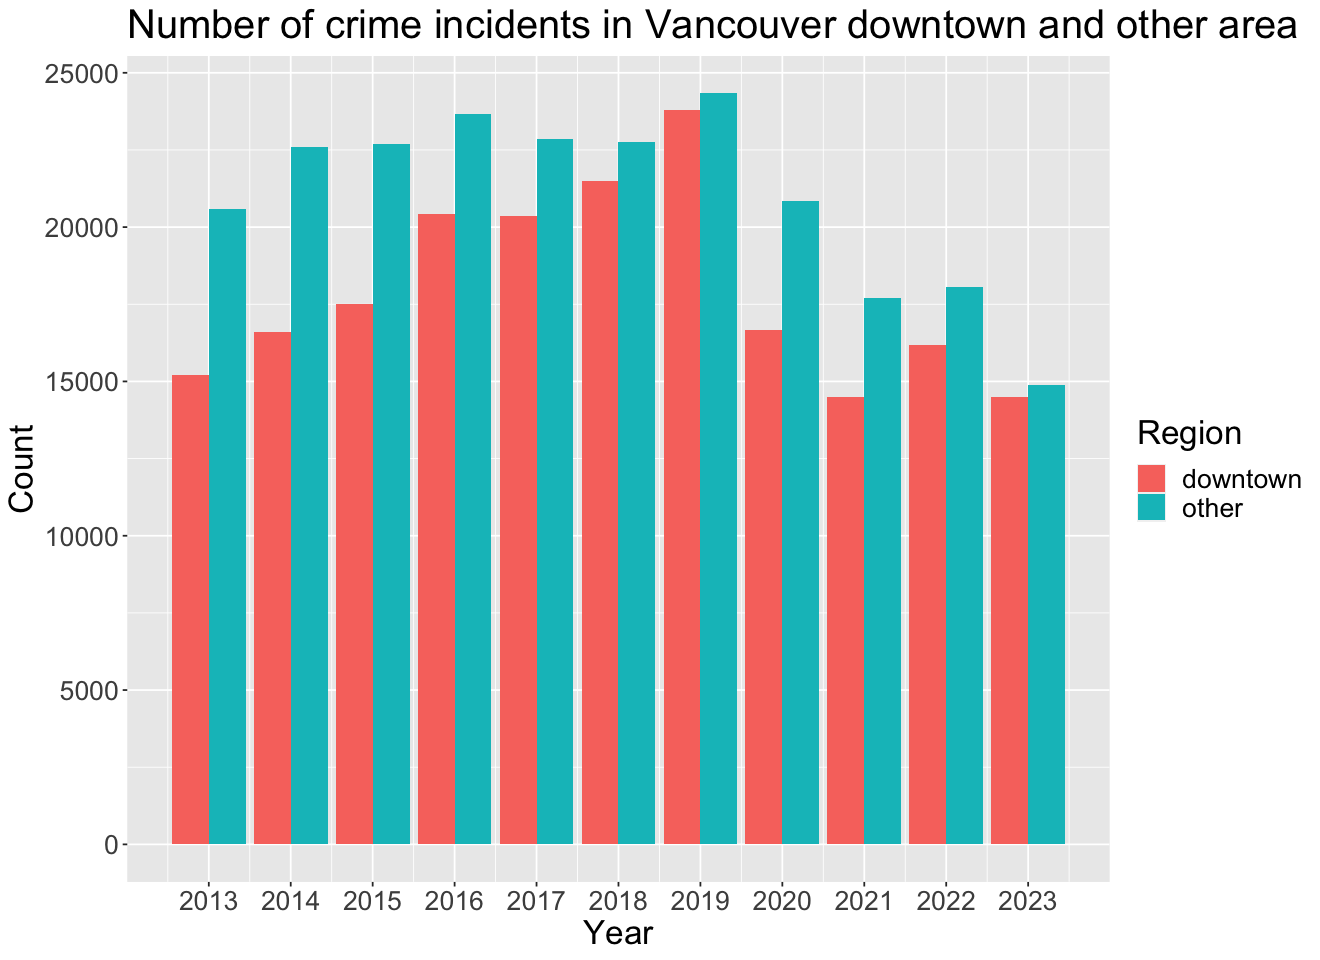

In [5]:
options(repr.plot.width = 11, repr.plot.height = 8)

crimedata_AllNBHD_23_13_barplot <-  criminedata_summary |>
    ggplot(aes(x = YEAR, y = count, fill = region)) +
    geom_bar(stat = "identity", position = "dodge") +
    scale_x_continuous(breaks = seq(2013,2023,1)) +
    labs(x = "Year", y = "Count", fill = "Region") +
    ggtitle("Number of crime incidents in Vancouver downtown and other area") +
    theme(text = element_text(size = 20))

crimedata_AllNBHD_23_13_barplot

In [6]:
criminedata_downtown_summary <- crimedata_AllNBHD_23_13 |>
    group_by(YEAR) |>
    summarize(downtown = sum(DOWNTOWN),
              Night = sum(DOWNTOWN & NIGHT),
              Day = sum(DOWNTOWN & !NIGHT)) |>
    pivot_longer(cols = Night:Day, names_to = "time", values_to = "count")

criminedata_downtown_summary

YEAR,downtown,time,count
<int>,<int>,<chr>,<int>
2013,15198,Night,7313
2013,15198,Day,7885
2014,16613,Night,7893
⋮,⋮,⋮,⋮
2022,16186,Day,8137
2023,14504,Night,6798
2023,14504,Day,7706


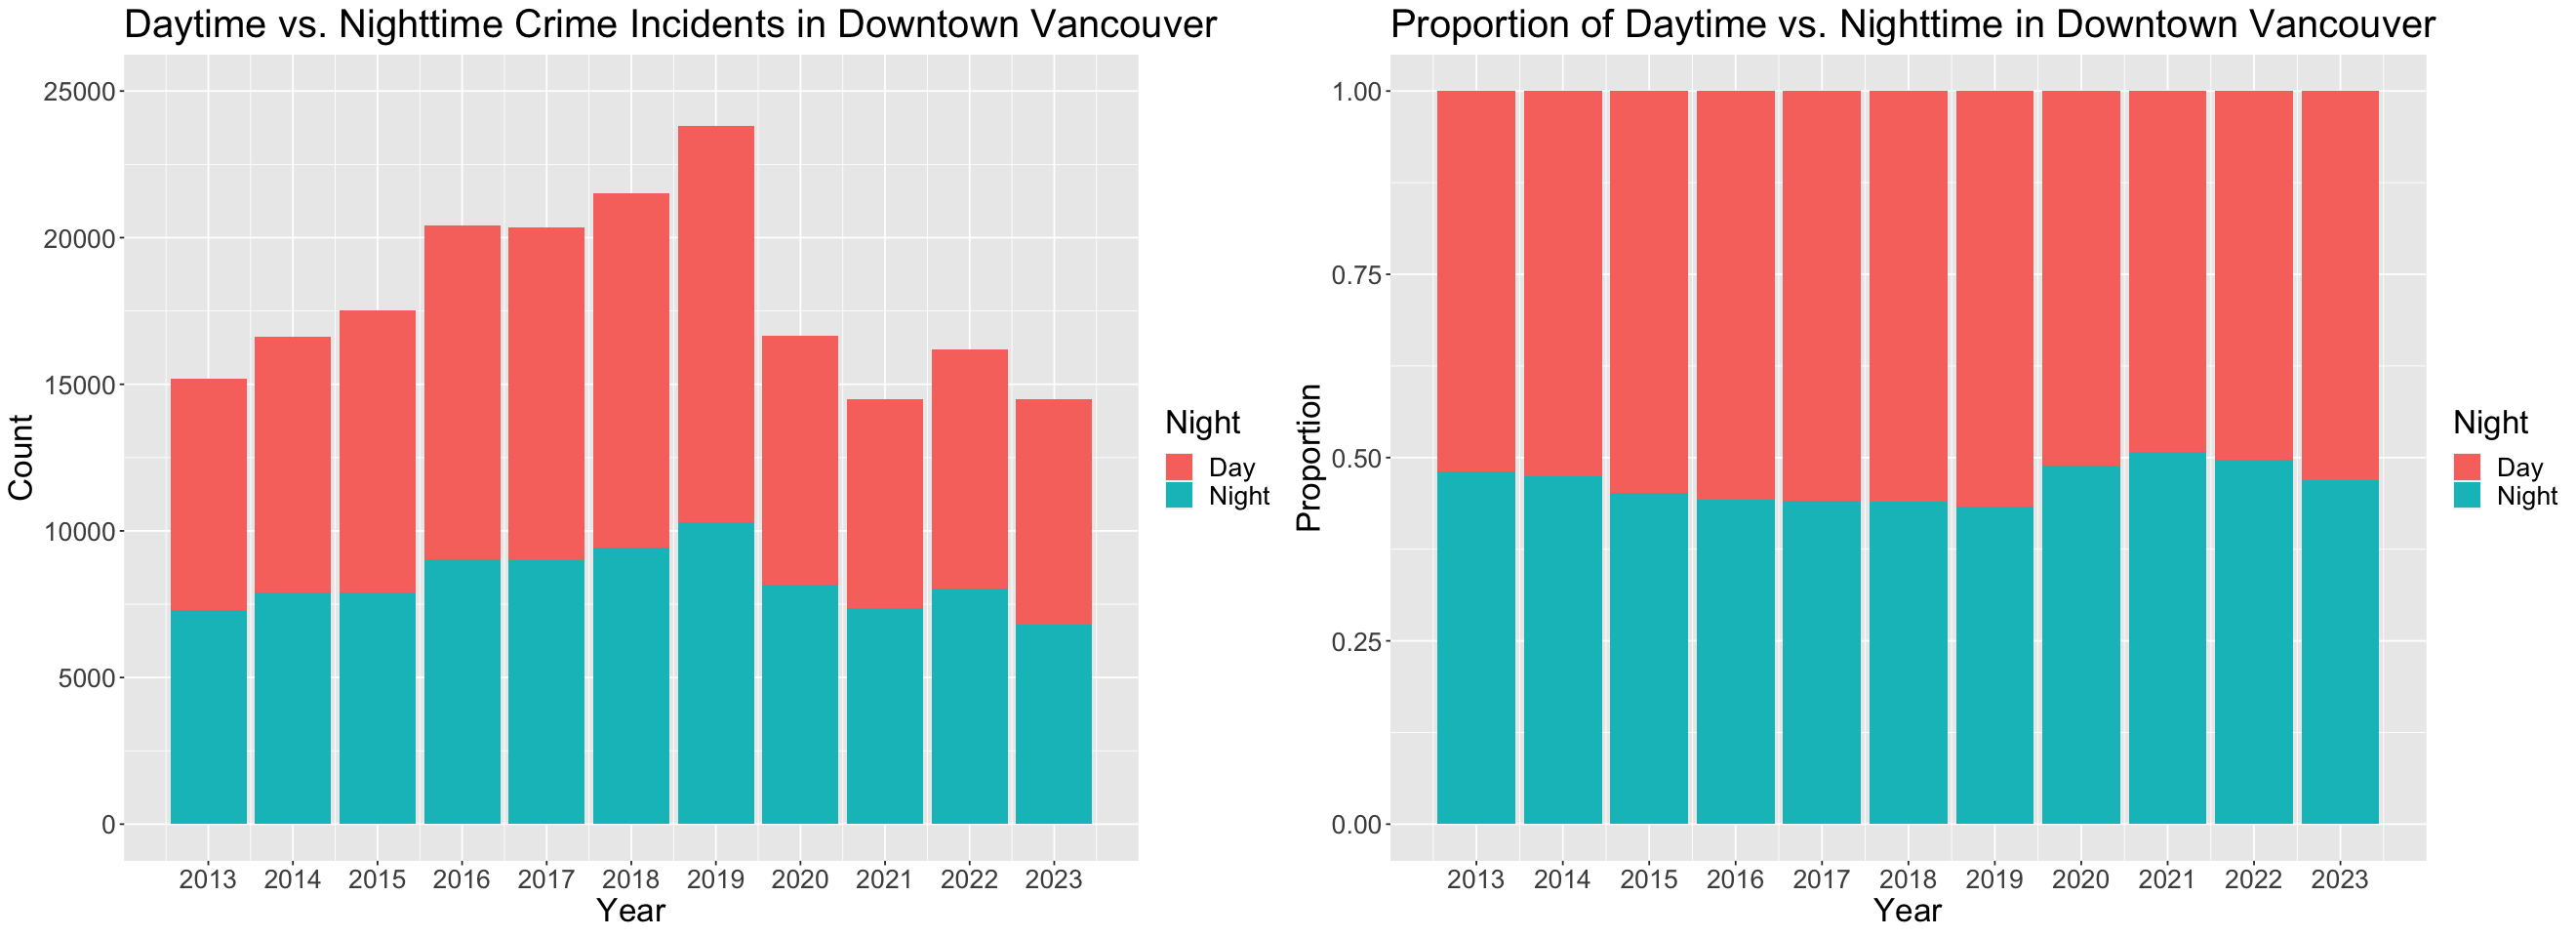

In [10]:
options(repr.plot.width = 11, repr.plot.height = 8)

crimedata_Downtown_23_13_barplot <-  criminedata_downtown_summary |>
    ggplot(aes(x = YEAR, y = count, fill = time)) +
    geom_bar(stat = "identity") +
    ylim(0, 25000) +
    scale_x_continuous(breaks = seq(2013,2023,1)) +
    labs(x = "Year", y = "Count", fill = "Night") +
    ggtitle("Daytime vs. Nighttime Crime Incidents in Downtown Vancouver") +
    theme(text = element_text(size = 20))
crimedata_Downtown_23_13_propplot <-  criminedata_downtown_summary |>
    ggplot(aes(x = YEAR, y = count, fill = time)) +
    geom_bar(stat = "identity",position = "fill") +
    scale_x_continuous(breaks = seq(2013,2023,1)) +
    labs(x = "Year", y = "Proportion", fill = "Night") +
    ggtitle("Proportion of Daytime vs. Nighttime in Downtown Vancouver") +
    theme(text = element_text(size = 20))

options(repr.plot.width = 22, repr.plot.height = 8)
plot_grid(crimedata_Downtown_23_13_barplot,
             crimedata_Downtown_23_13_propplot,
             ncol = 2)